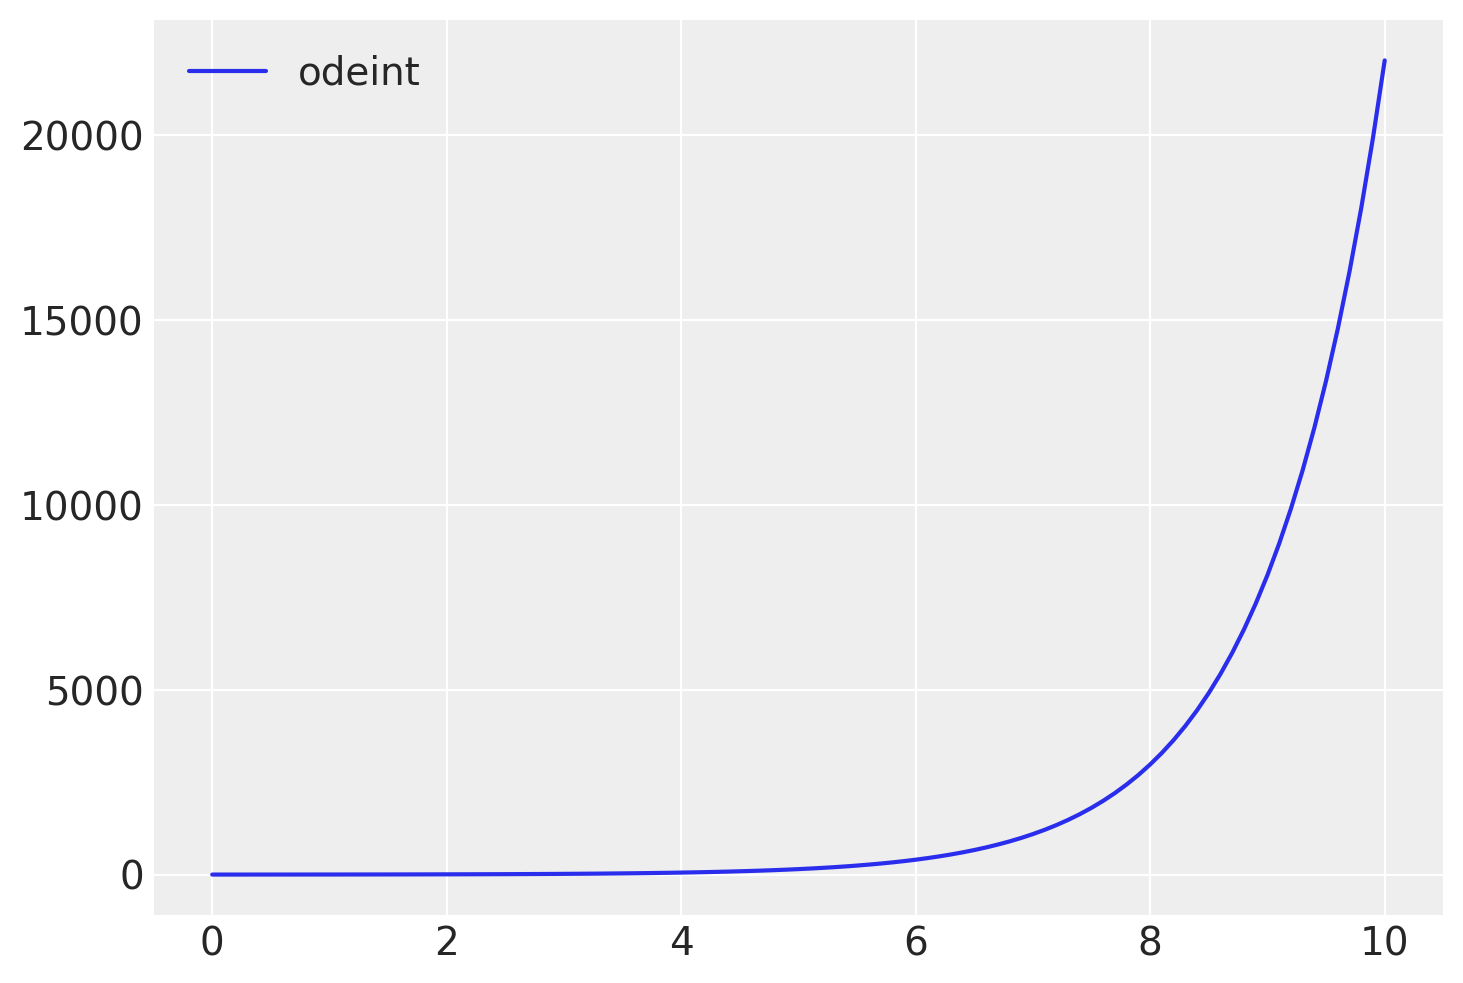

In [167]:
import math
import numpy as np
from scipy.integrate import odeint, RK45
import matplotlib.pyplot as plt
import arviz as az
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
# %matplotlib ipympl
%matplotlib inline

def func(y, t):
    return y
t=np.arange(0,10.1,0.1)

YS=odeint(func,y0=1,t=t)


plt.plot(t, YS, label='odeint')
plt.legend()
plt.show()


In [46]:
# %matplotlib widget
# %matplotlib ipympl
%matplotlib inline
# %matplotlib notebook
# %pylab
def lorenz(w, t, p, r, b):
    # 给出位置矢量w,和三个参数p, r, b计算出
    # dx/dt, dy/dt, dz/dt的值
    x, y, z = w
    # 直接与lorenz的计算公式对应
    return np.array([p*(y-x), x*(r-z)-y, x*y-b*z])

t = np.arange(0, 30, 0.01) # 创建时间点
# 调用ode对lorenz进行求解, 用两个不同的初始值
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0))

# 绘图
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0], track1[:,1], track1[:,2])
ax.plot(track2[:,0], track2[:,1], track2[:,2])
plt.show()

<Figure size 720x480 with 0 Axes>

In [169]:
from core import *

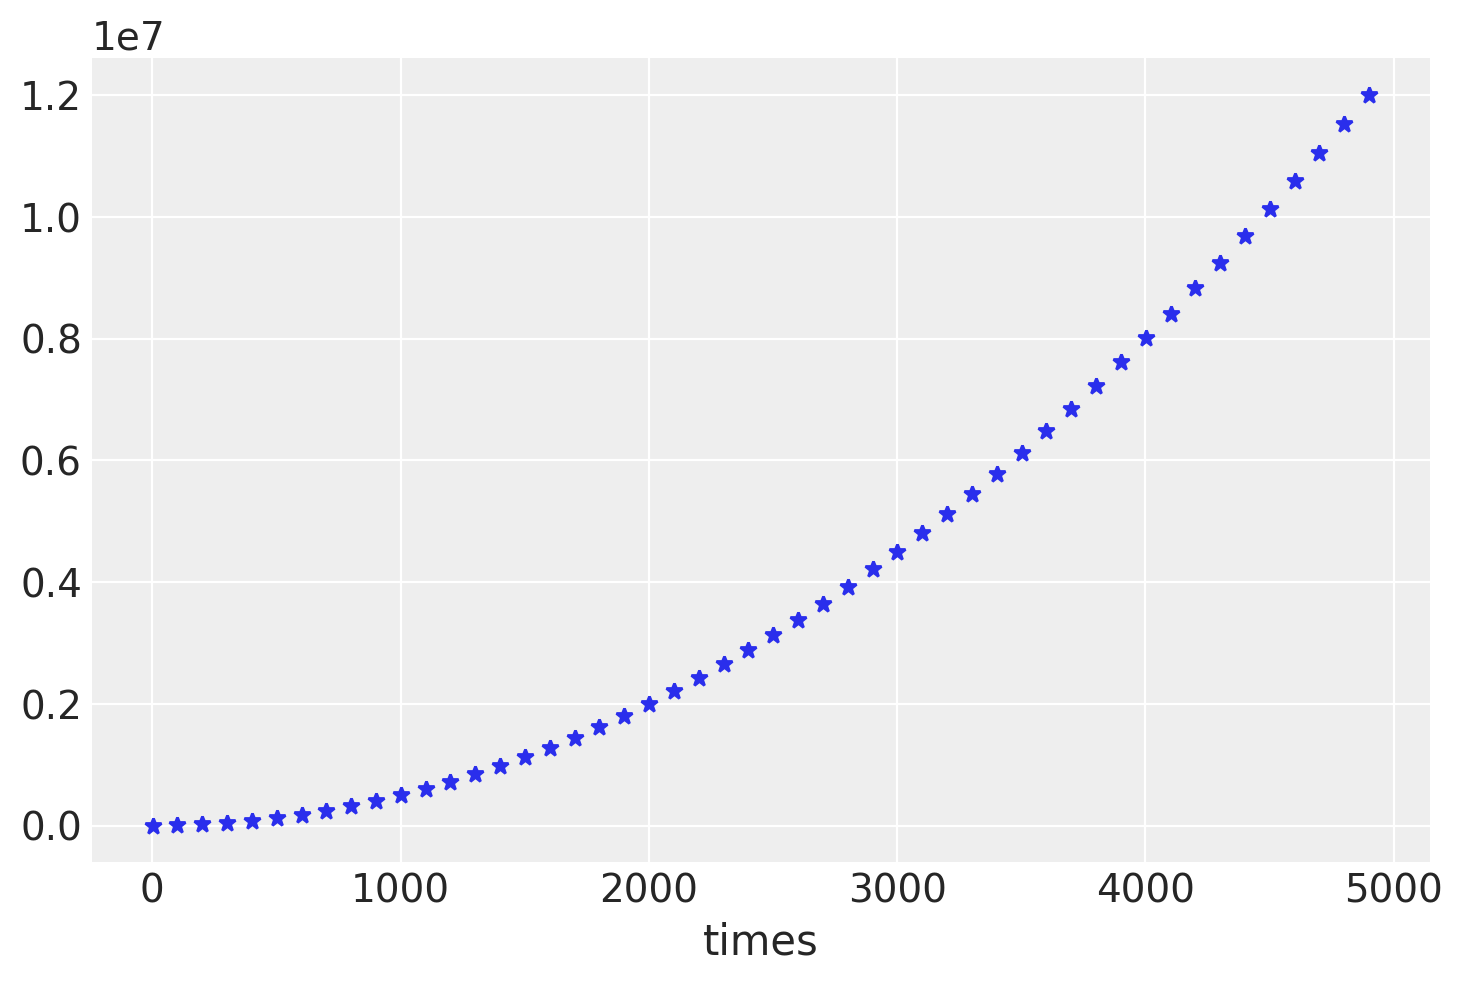

In [170]:
from scipy.integrate import solve_ivp
# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

def fun(t, y):
    dydt = [t]
    return dydt

# 初始条件
y0 = [0]

yy = solve_ivp(fun, (0, 5000), y0, method='Radau',t_eval = np.arange(1,5000,100) )
xx = solve_ivp(fun, (0, 5000), y0, method='Radau')

t = yy.t
data = yy.y

t2 = xx.t
data2 = xx.y
fig = plt.figure()

plt.plot(t, data[0, :],'*')
# plt.plot(t2, data2[0, :],'+')

plt.xlabel("times")
# plt.legend(["求解变量"])
plt.show()


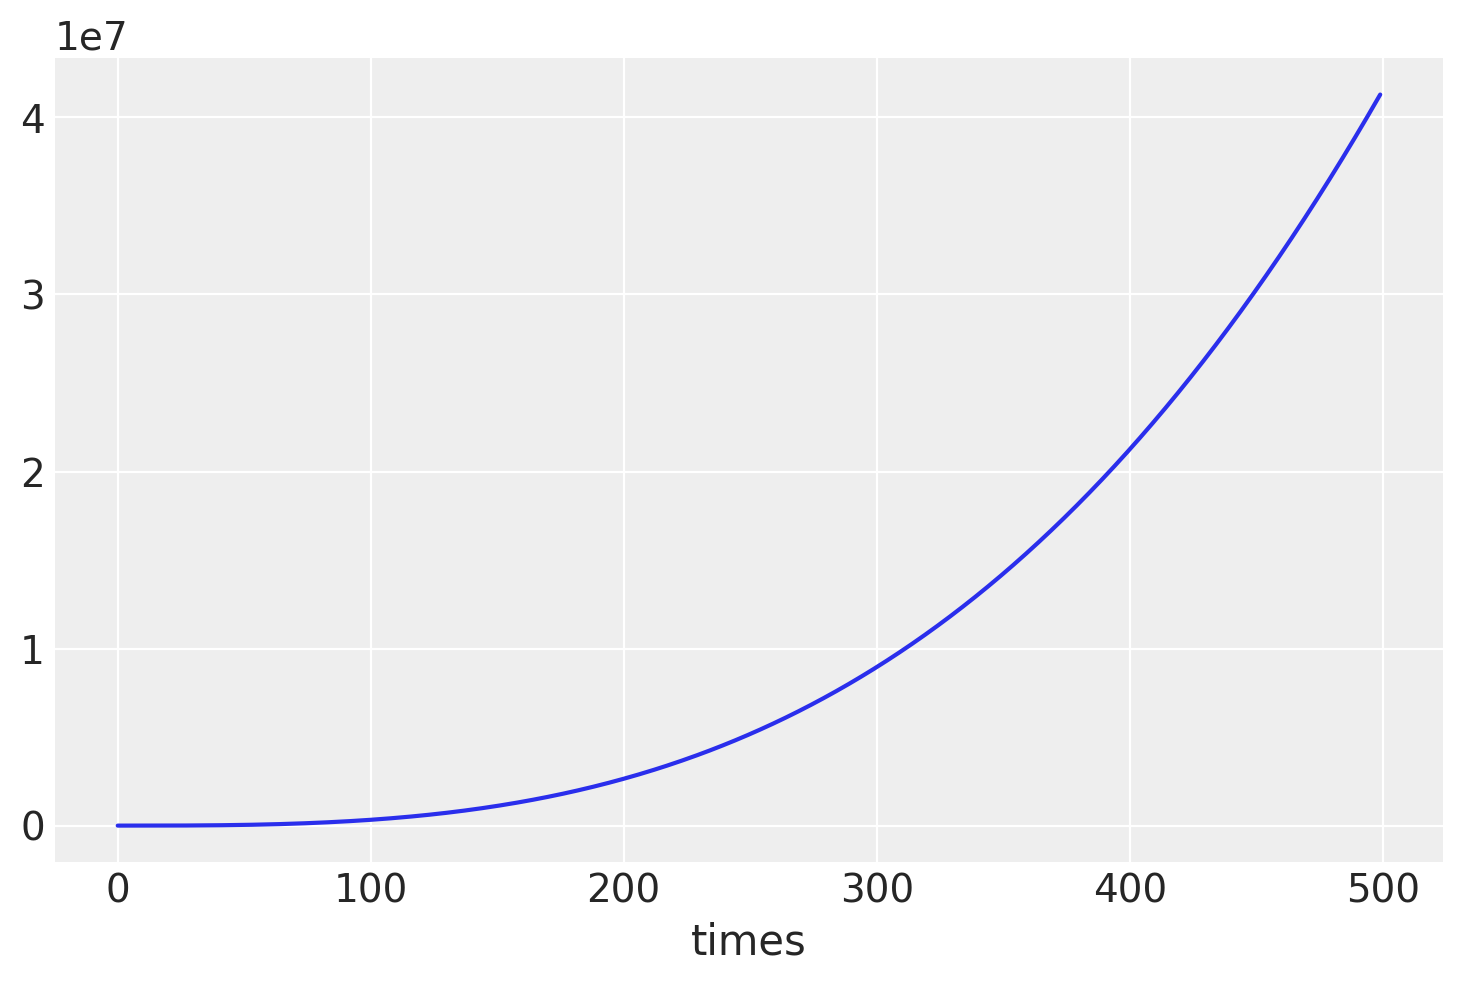

In [171]:
from scipy.integrate import solve_ivp

def fun(t, y, *args):
    y1 = y[0]
    y2 = y[1]
    dydt = [y2, t*t-y2+t]
    # print(y)
    return dydt

# 初始条件
y0 = [0,0]

yy = solve_ivp(fun, (0, 500), y0, method='RK45',t_eval = np.arange(0,500,1),args=(1,2,3) )
t = yy.t
data = yy.y
plt.plot(t, data[0, :])
# plt.plot(t, data[1, :])
plt.xlabel("times")
# plt.legend("求解变")
plt.show()


In [173]:
from scipy.integrate import solve_ivp

def dcdt_func(t, c, ks, k_kinetics):

    c_xNH3,c_xNO3,c_xNO2,c_xNOrg,c_xN2,c_ANH3,c_ANO3,c_ANO2,c_ANOrg, c_AN2 = c
    
    
    r1 = ks[0] * c_xN2 if k_kinetics[0] == 1 else ks[0]
    r2 = ks[1] * c_xNH3 if k_kinetics[1] == 1 else ks[1]
    r3 = ks[2] * c_xNO2 if k_kinetics[2] == 1 else ks[2]
    r4 = ks[3] * c_xNO3 if k_kinetics[3] == 1 else ks[3]
    r5 = ks[4] * c_xNO2 if k_kinetics[4] == 1 else ks[4]
    r6 = ks[5] * c_xNO2 * c_xNO3 if k_kinetics[5] == 1 else ks[5]
    r7 = ks[6] * c_xNO3 if k_kinetics[6] == 1 else ks[6]
    r8 = ks[7] * c_xNO3 if k_kinetics[7] == 1 else ks[7]
    r9 = ks[8] * c_xNH3 if k_kinetics[8] == 1 else ks[8]
    r10 = ks[9] * c_xNOrg if k_kinetics[9] == 1 else ks[9]
    r11 = ks[10] * c_xNOrg if k_kinetics[10] == 1 else ks[10]
    
    
    dc_xNH3=  2*r1 + r7 + r10 - r2 - r6 - r9
    dc_xNO3= r3 - r7 - r4 - r8 + r11
    dc_xNO2= r2 + r4 - r3 - r6 - 2*r5
    dc_xNOrg= r8 + r9 - r10 -r11
    dc_xN2= r5 + r6 - r1
    dc_ANH3= (2*r1*(c_AN2 - c_ANH3) + (c_ANO3-c_ANH3)*r7 + (c_ANOrg-c_ANH3)*r10 )/c_xNH3
    dc_ANO3= ( (c_ANO2 - c_ANO3)*r2 + (c_ANOrg - c_ANO3)*r11 ) / c_xNO3
    dc_ANO2= ( (c_ANH3-c_ANO2 )*r2 + (c_ANO3-c_ANO2)*r4 ) / c_xNO2
    dc_ANOrg= ( (c_ANO3-c_ANOrg )*r8 + (c_ANH3-c_ANOrg)*r9 ) / c_xNOrg
    dc_AN2= ( (c_ANO2-c_AN2 )*r5 + (c_ANO2*c_ANH3 - c_AN2)*r6 ) / c_xN2
    
    dcdts = [dc_xNH3,dc_xNO3,dc_xNO2,dc_xNOrg,dc_xN2,dc_ANH3,dc_ANO3,dc_ANO2,dc_ANOrg, dc_AN2]
    
    # print(dcdts)
    # print(y)
    return dcdts

In [146]:
from scipy.integrate import solve_ivp

def dcdt_func2(c, t, ks, k_kinetics):

    c_xNH3,c_xNO3,c_xNO2,c_xNOrg,c_xN2,c_ANH3,c_ANO3,c_ANO2,c_ANOrg, c_AN2 = c
    
    
    r1 = ks[0] * c_xN2 if k_kinetics[0] == 1 else ks[0]
    r2 = ks[1] * c_xNH3 if k_kinetics[1] == 1 else ks[1]
    r3 = ks[2] * c_xNO2 if k_kinetics[2] == 1 else ks[2]
    r4 = ks[3] * c_xNO3 if k_kinetics[3] == 1 else ks[3]
    r5 = ks[4] * c_xNO2 if k_kinetics[4] == 1 else ks[4]
    r6 = ks[5] * c_xNO2 * c_xNO3 if k_kinetics[5] == 1 else ks[5]
    r7 = ks[6] * c_xNO3 if k_kinetics[6] == 1 else ks[6]
    r8 = ks[7] * c_xNO3 if k_kinetics[7] == 1 else ks[7]
    r9 = ks[8] * c_xNH3 if k_kinetics[8] == 1 else ks[8]
    r10 = ks[9] * c_xNOrg if k_kinetics[9] == 1 else ks[9]
    r11 = ks[10] * c_xNOrg if k_kinetics[10] == 1 else ks[10]
    
    
    dc_xNH3=  2*r1 + r7 + r10 - r2 - r6 - r9
    dc_xNO3= r3 - r7 - r4 - r8 + r11
    dc_xNO2= r2 + r4 - r3 - r6 - 2*r5
    dc_xNOrg= r8 + r9 - r10 -r11
    dc_xN2= r5 + r6 - r1
    dc_ANH3= (2*r1*(c_AN2 - c_ANH3) + (c_ANO3-c_ANH3)*r7 + (c_ANOrg-c_ANH3)*r10 )/c_xNH3
    dc_ANO3= ( (c_ANO2 - c_ANO3)*r2 + (c_ANOrg - c_ANO3)*r11 ) / c_xNO3
    dc_ANO2= ( (c_ANH3-c_ANO2 )*r2 + (c_ANO3-c_ANO2)*r4 ) / c_xNO2
    dc_ANOrg= ( (c_ANO3-c_ANOrg )*r8 + (c_ANH3-c_ANOrg)*r9 ) / c_xNOrg
    dc_AN2= ( (c_ANO2-c_AN2 )*r5 + (c_ANO2*c_ANH3 - c_AN2)*r6 ) / c_xN2
    
    dcdts = [dc_xNH3,dc_xNO3,dc_xNO2,dc_xNOrg,dc_xN2,dc_ANH3,dc_ANO3,dc_ANO2,dc_ANOrg, dc_AN2]
    
    # print(dcdts)
    # print(y)
    return dcdts

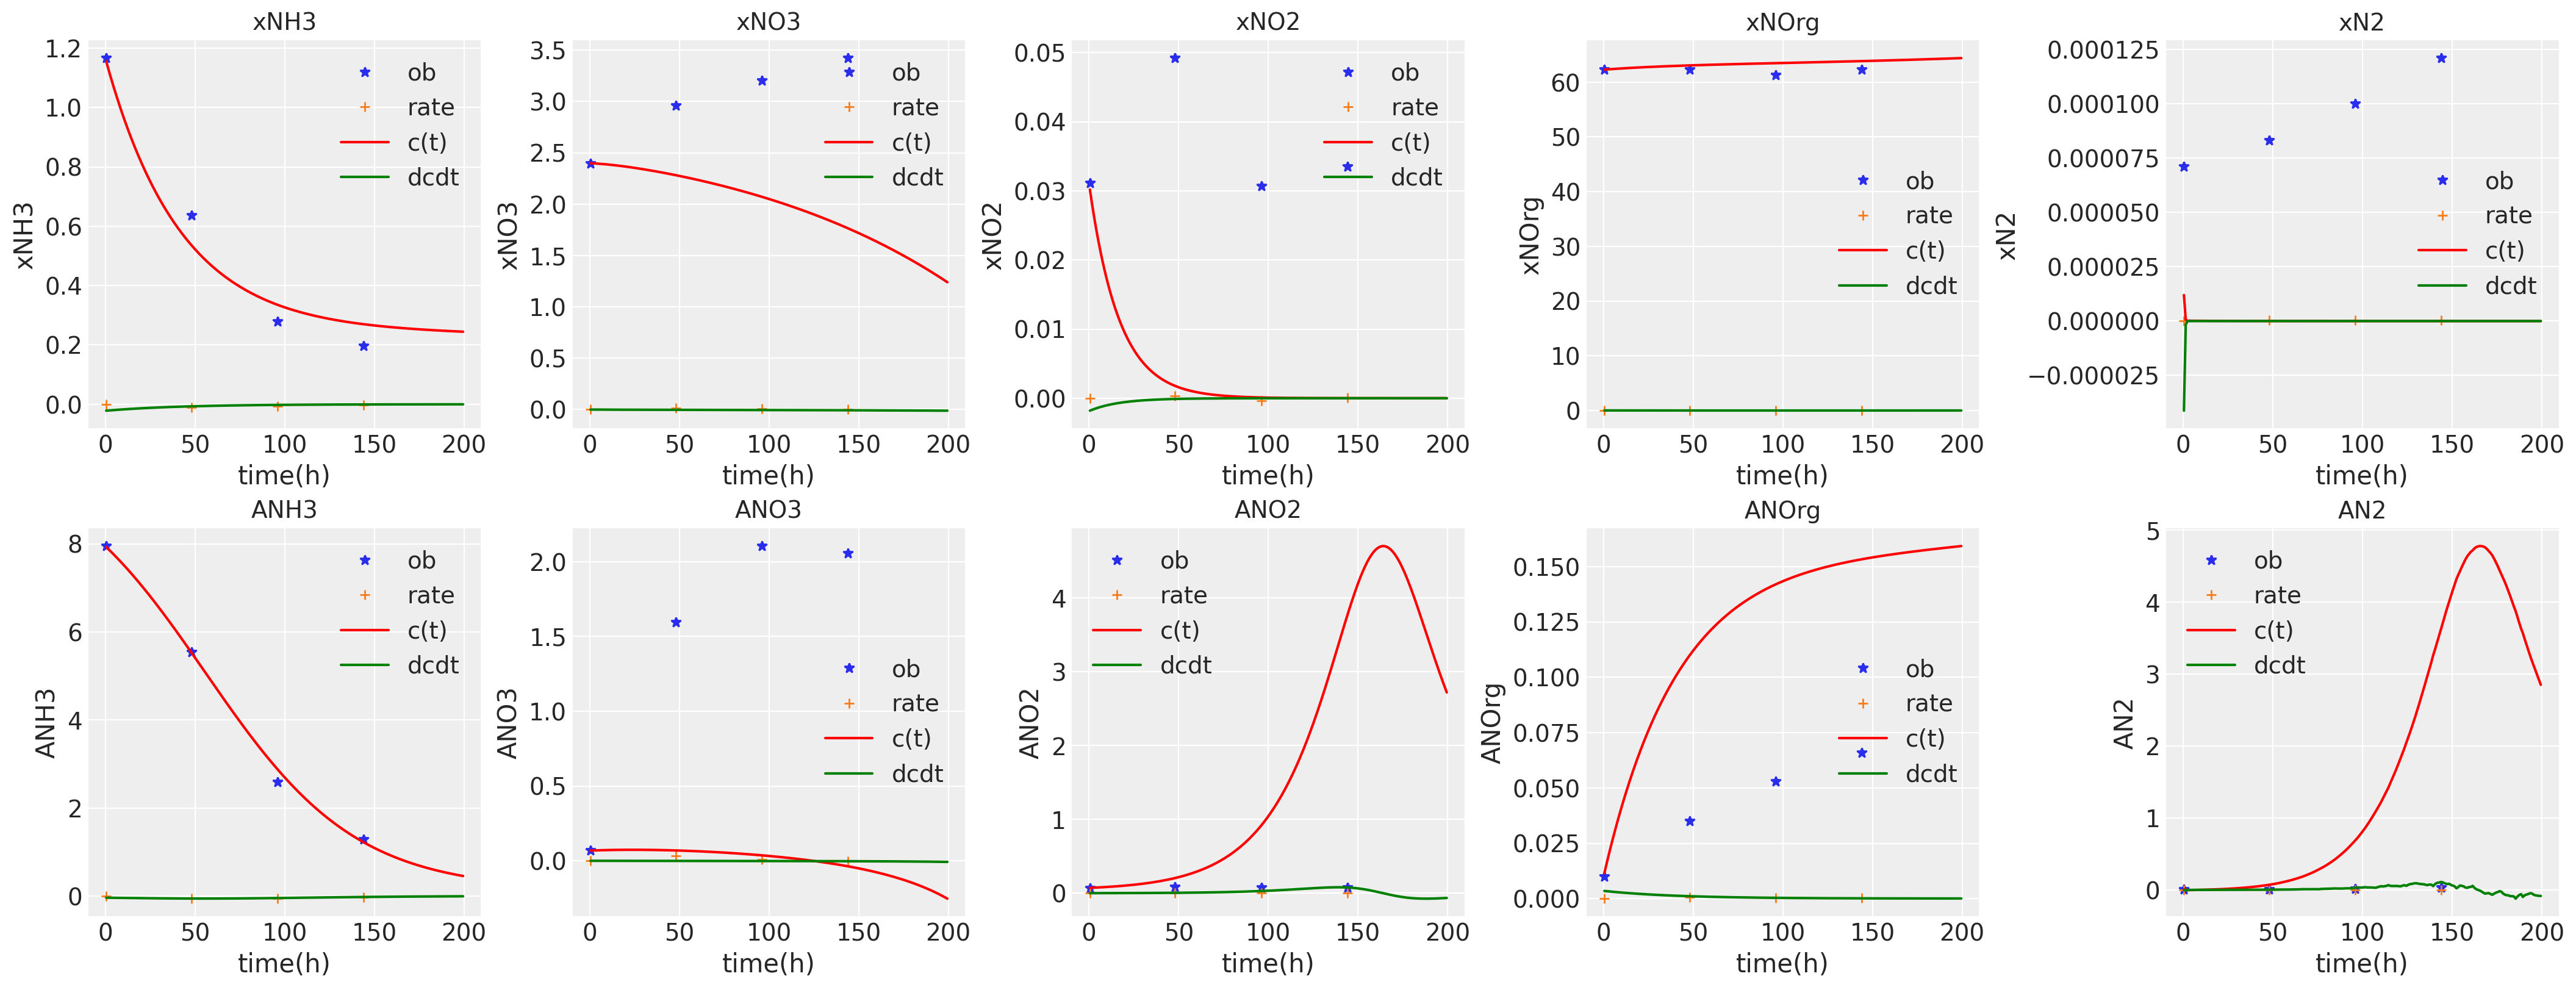

In [185]:
dataset = MyDataset("dataset/data.csv")
df = dataset.get_df()
cct_names,rates_names,error_names = dataset.get_var_col_names()


# 初始条件
k_kinetics = np.repeat(1,11)
c0 = df[cct_names].iloc[0].values
rates = df[rates_names]


ks_res = ltq_fit(dataset,k_kinetics )
ks = ks_res
# ks = np.random.rand(11)
# ks= np.repeat(1,11)

t_eval = np.arange(0.5,200,1)


res = solve_ivp(dcdt_func, (0, 200), c0, method='RK45',t_eval = t_eval, args=(ks,k_kinetics))
cs = res.y
t_eval = res.t

# res = odeint(func=dcdt_func2, y0=c0, t=t_eval, args=(ks,k_kinetics))
# cs = np.transpose(res, [1,0])



# 计算导数曲线
derivative = []
# 10*150
dcdt_df = pd.DataFrame(columns=['time'] + cct_names)

for i,t in enumerate(t_eval):
    cct = cs[:,i]
    dcdts = dcdt_func(t, cct, ks, k_kinetics)
    dcdt_df.loc[len(dcdt_df.index)] = [t] + dcdts


cols = 5
rows = math.ceil(len(cct_names) / cols)

fig, fig_axes = plt.subplots(ncols=cols, nrows=rows, figsize=(4.2*cols,4*rows), dpi=100)
if isinstance(fig_axes, np.ndarray):
    fig_axes = fig_axes.reshape(-1)
else:
    fig_axes = [fig_axes]


for i, axes in enumerate(fig_axes):
    if i >= len(cct_names):
        axes.axis('off')
        continue

    y_name = cct_names[i]
    Y = df[y_name].values
    axes.plot(df['time'].values, Y, '*', label=f"ob")
    axes.set_ylabel(f'{y_name}')
    axes.set_xlabel(f'time(h)')

    
    axes.plot(df['time'].values, df[rates_names[i]].values, '+', label=f"rate")
    axes.set_ylabel(f'{y_name}')
    axes.set_xlabel(f'time(h)')

    
    # z3 = np.polyfit(X, Y, deg=3)
    # p3 = np.poly1d(z3)
    # yvals = p3(xvals)
    # pred = p3(X)
    # _r2 = r2(pred, Y)
    # axes.plot(xvals, yvals, 'g', label=f'deg=3 R^2={_r2:.2f}')
    
    axes.plot(t_eval, cs[i,:],'r', label=f"c(t)")
    axes.plot(t_eval, dcdt_df[y_name].values,'g', label=f"dcdt")
    
    
    axes.legend()
    axes.set_title(f"{y_name}", fontsize=14)

plt.tight_layout()
plt.show()


In [143]:
dcdt_df

,time,xNH3,xNO3,xNO2,xNOrg,xN2,ANH3,ANO3,ANO2,ANOrg,AN2
0,0.0,-0.021572,-0.000694,-1.856683e-03,0.024619,-2.480075e-04,-0.042378,0.000486,0.001051,0.003527,-0.000096
1,1.0,-0.021535,-0.000815,-1.748986e-03,0.024114,-7.527388e-06,-0.039638,0.000462,0.001090,0.003441,-0.002505
2,2.0,-0.021041,-0.000930,-1.647538e-03,0.023619,-2.367007e-07,-0.040079,0.000438,0.001129,0.003358,-0.007919
3,3.0,-0.020544,-0.001040,-1.551977e-03,0.023136,-1.504377e-08,-0.040617,0.000414,0.001170,0.003277,-0.000054
4,4.0,-0.020059,-0.001146,-1.461962e-03,0.022666,-7.992948e-09,-0.041157,0.000391,0.001213,0.003197,0.000468
...,...,...,...,...,...,...,...,...,...,...,...
195,195.0,-0.000286,-0.011207,3.604939e-08,0.011493,2.138553e-13,-0.008064,-0.006079,-0.069459,0.000088,-0.071521
196,196.0,-0.000281,-0.011292,3.801636e-08,0.011573,2.253425e-13,-0.007891,-0.006234,-0.068373,0.000087,-0.070701
197,197.0,-0.000277,-0.011377,3.992223e-08,0.011654,2.365306e-13,-0.007722,-0.006394,-0.067207,0.000087,-0.069659
198,198.0,-0.000273,-0.011463,4.177018e-08,0.011737,2.474277e-13,-0.007557,-0.006561,-0.065970,0.000087,-0.068462


(10, 200)